In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to C:\Users\Husein
[nltk_data]     Ghadiali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Husein
[nltk_data]     Ghadiali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Husein
[nltk_data]     Ghadiali\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Husein
[nltk_data]     Ghadiali\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Husein Ghadiali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('master_review_v2.csv')
df.head()

,Product_name,SKU,Price,Subject,Date,Review,Stars,like,dislike
0,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,"Good toilet, complete kit w/ soft-close seat","July 12, 2021",Install go mostly accord plan however bolts se...,5,13,2
1,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,Easy Install,"July 3, 2021",easy install Make sure someone help carry box ...,5,6,0
2,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,Hotel Flusher,"August 6, 2021",first thing want say youve ever stayed hotel u...,4,10,1
3,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,Gorgeous toilet,"July 17, 2021",get toilet think different get installed appar...,5,6,3
4,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,Great functioning toilet,"August 29, 2021",toilet toilet pretty much Good thing toilet po...,5,8,0


In [3]:
# Convert datatypes to best possiblle
df = df.convert_dtypes()
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Verifying the data types
df.dtypes

Product_name    string[python]
SKU             string[python]
Price                    Int64
Subject         string[python]
Date            datetime64[ns]
Review          string[python]
Stars                    Int64
like                     Int64
dislike                  Int64
dtype: object

In [4]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [5]:
# Define a function to extract positive and negative phrases from a review
def extract_phrases(text):
    sentences = tokenize.sent_tokenize(text)
    positive_phrases = []
    negative_phrases = []
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        if ss['compound'] > 0.5:
            positive_phrases.append(sentence)
        elif ss['compound'] < -0.5:
            negative_phrases.append(sentence)
    return positive_phrases, negative_phrases

In [6]:
# Apply the function to each review and create new columns for positive and negative phrases
df['positive_phrases'], df['negative_phrases'] = zip(*df['Review'].apply(extract_phrases))

In [7]:
# Group the data by model and extract the most common positive and negative phrases
grouped = df.groupby('SKU')
most_common_positive_phrases = grouped['positive_phrases'].apply(lambda x: pd.Series(x.sum()).value_counts().head())
most_common_negative_phrases = grouped['negative_phrases'].apply(lambda x: pd.Series(x.sum()).value_counts().head())

In [8]:
def color_func(word, font_size, position, orientation, font_path, random_state):
    if font_size > 70:
        return "#8B0000"
    else:
        return "black"

In [9]:
# Create a word cloud for the most common positive phrases
positive_text = ' '.join(map(str, most_common_positive_phrases.index))
positive_text = ' '.join([word for word in positive_text.split() if word.lower() != 'toilet'])
positive_wordcloud = WordCloud(background_color='white', width=1600, height=1600, color_func=color_func).generate(positive_text)

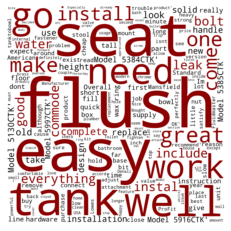

In [10]:
# Display the word cloud
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Create a word cloud for the most common negative phrases
negative_text = ' '.join(map(str, most_common_negative_phrases.index))
negative_text = ' '.join([word for word in negative_text.split() if word.lower() != 'toilet'])
negative_text = ' '.join([word for word in negative_text.split() if word.lower() != 'flush'])
negative_text = ' '.join([word for word in negative_text.split() if word.lower() != 'tank'])
negative_text = ' '.join([word for word in negative_text.split() if word.lower() != 'instal'])
negative_wordcloud = WordCloud(background_color='white', width=1600, height=1600, color_func=color_func).generate(negative_text)

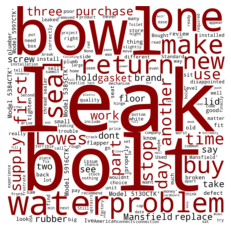

In [14]:
# Display the word cloud
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()